<a href="https://colab.research.google.com/github/kamilafariasg/timeseries-prophet/blob/main/prophet_series_temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aplicando o *Prophet* na Base de Dados Champagne.**

### **Montando conexão com o Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importando Bibliotecas**

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error
from math import sqrt

%matplotlib inline 
#usar esse comando para não precisar dar plt.show em cada gráfico

### **Lendo Base de Dados**

In [4]:
dataset = pd.read_csv("/content/drive/My Drive/dataset/champagne.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   105 non-null    object
 1   Sales   105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


### **Análise sobre os Dados**

É mostrado que existem 105 observações e 2 colunas.

In [5]:
dataset.shape

(105, 2)

Amostra da base de dados.

In [6]:
dataset.head(10)

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946
5,1964-06,3036
6,1964-07,2282
7,1964-08,2212
8,1964-09,2922
9,1964-10,4301


Verificando quantidade de informações nulas

In [10]:
dataset.isnull().sum()

Month    0
Sales    0
dtype: int64

Verifica que não há dados duplicados

In [13]:
len(dataset.duplicated())

105

Visão geral das séries numéricas

In [15]:
dataset.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


Distribuição dos dados

Text(0.5, 1.0, 'Série de vendas de champagne ')

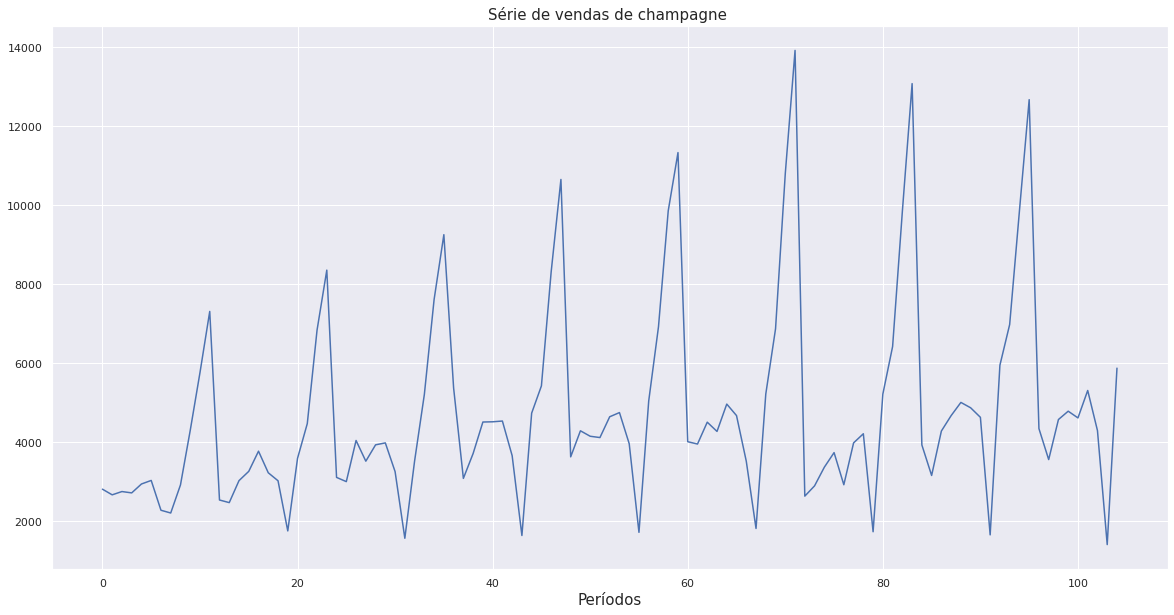

In [21]:

plt.figure(figsize=(20,10))
dataset["Sales"].plot()
plt.xlabel('Períodos',size=15)
plt.title('Série de vendas de champagne ',size=15)


### **Transformando os dados de data em formato datetime**

In [7]:
dataset['Month']=pd.to_datetime(dataset['Month'])
dataset.head(10)

,Month,Sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946
5,1964-06-01,3036
6,1964-07-01,2282
7,1964-08-01,2212
8,1964-09-01,2922
9,1964-10-01,4301


## **Prophet**

### **Separando os dados para treino e teste**

In [22]:
# pega a quantidade de linhas e subtrai pela quantidade de teste
split_point = len(dataset) - 30

In [23]:
# define que a variável treino vai conter linhas até o split_point
treino = dataset[0:split_point]

In [40]:
# define que a variável validation terá os dados do split_point em diante
validation = dataset[split_point:]

In [26]:
# imprime o tamanho dos conjuntos
print('Treino %d, Validation %d' % (len(treino), len(validation)))

Treino 75, Validation 30


### **Renomeando colunas**

Por padrão, o *Prophet* trabalha com uma coluna *ds* e outra *y*. A coluna ds faz referência aos dados temporais e a coluna y faz referência aos dados quantitativos. 

In [41]:
# ds: features temporais
# y: valores a serem preditos

dataset.columns=['ds','y']
dataset.tail()

,ds,y
100,1972-05-01,4618
101,1972-06-01,5312
102,1972-07-01,4298
103,1972-08-01,1413
104,1972-09-01,5877


### **Modelagem com Prophet**

In [31]:
# instancia o objeto prophet
model = Prophet()

In [32]:
# gerando o modelo
model.fit(dataset)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### **Trabalhando com dados futuros**

In [35]:
# gerando dados futuros
futuro = model.make_future_dataframe(periods = 35, freq='MS')
futuro

,ds
0,1964-01-01
1,1964-02-01
2,1964-03-01
3,1964-04-01
4,1964-05-01
...,...
135,1975-04-01
136,1975-05-01
137,1975-06-01
138,1975-07-01


In [36]:
# prevendo valores para dados futuros
saida = model.predict(futuro)
saida[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
133,1975-02-01,4616.338200,3659.706546,5547.169075
134,1975-03-01,4964.983938,3995.854607,5858.093063
135,1975-04-01,5422.889201,4477.272107,6384.411499
136,1975-05-01,5560.963302,4645.328066,6527.450307
137,1975-06-01,5635.270456,4668.985508,6564.568952
138,1975-07-01,5241.813197,4319.407022,6197.913776
139,1975-08-01,2798.410657,1830.314703,3710.733425


### **Validando Modelo**

In [43]:
validacao=pd.DataFrame({'ds':validation['ds']})
validacao['ds'].head()

75   1970-04-01
76   1970-05-01
77   1970-06-01
78   1970-07-01
79   1970-08-01
Name: ds, dtype: datetime64[ns]

In [46]:
# aplicando o modelo do prophet
saida = model.predict(validacao)
# imprime as saidas
saida[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1970-04-01,4579.752338,3585.383821,5524.182252
1,1970-05-01,4745.920259,3882.506618,5706.743920
2,1970-06-01,4839.009965,3887.687512,5772.514880
3,1970-07-01,4310.677481,3421.339748,5257.923983
4,1970-08-01,2171.456391,1281.565954,3140.207131


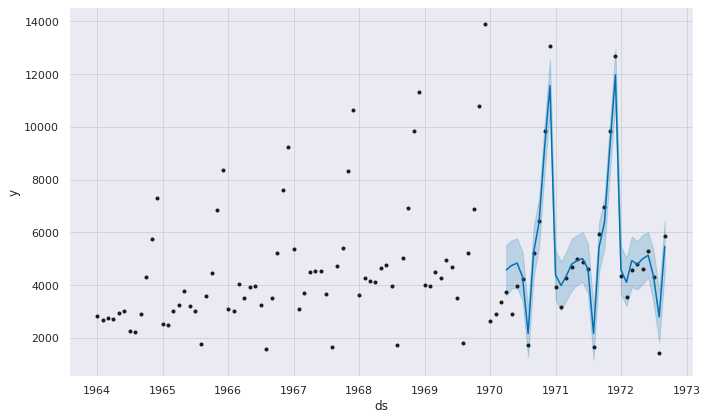

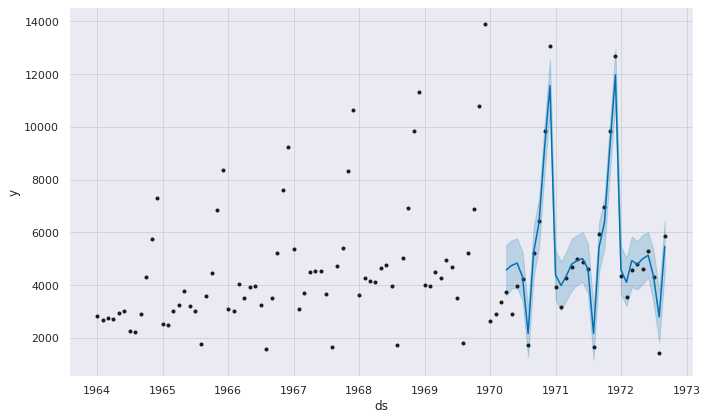

In [50]:
model.plot(saida)


### **Plotando componentes tendência e sazonalidade.**

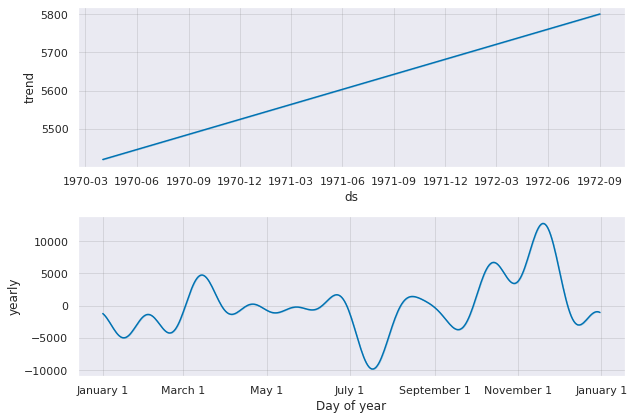

In [51]:
model.plot_components(saida);

### **Avaliando os resultados**

In [64]:
rmse = sqrt(mean_squared_error(validation.y, saida.yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 657.396


In [81]:
mae = mean_absolute_error(validation.y, saida.yhat)
print('Test MAE: %.3f' % mae)


Test MAE: 476.999


### **Customizando Modelo**

In [68]:
model = Prophet(seasonality_mode='multiplicative')

In [69]:
model.fit(dataset)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [73]:
validacao2=pd.DataFrame({'ds':validation['ds']})
validacao2['ds'].head()

75   1970-04-01
76   1970-05-01
77   1970-06-01
78   1970-07-01
79   1970-08-01
Name: ds, dtype: datetime64[ns]

In [74]:
saida2 = model.predict(validacao2)

### **Avaliando Resultados**

In [79]:
rmse_customizado = sqrt(mean_squared_error(validation.y, saida2.yhat))
print('Test RMSE: %.3f' % rmse_customizado)

Test RMSE: 483.861


In [80]:
mae_customizado = mean_absolute_error(validation.y, saida.yhat)
print('Test MAE: %.3f' % mae_customizado)

Test MAE: 476.999
